## Preparando ambiente



In [1]:
install.packages('raster')
require(raster)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sp’, ‘terra’


Loading required package: raster

Loading required package: sp



In [2]:
install.packages('rgdal')
require(rgdal)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: rgdal

Please note that rgdal will be retired by the end of 2023,
plan transition to sf/stars/terra functions using GDAL and PROJ
at your earliest convenience.

rgdal: version: 1.5-27, (SVN revision 1148)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 2.2.3, released 2017/11/20
Path to GDAL shared files: /usr/share/gdal/2.2
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
Path to PROJ shared files: (autodetected)
Linking to sp version:1.4-6



In [3]:
install.packages('rpart')
require(rpart)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: rpart



In [4]:
install.packages('randomForest')
require(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: randomForest

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



## Pontos de referência para treinamento

In [13]:
pontosTreinamento = shapefile('cipef_poi.shp')
table(pontosTreinamento@data$class)


 1  2 
26 33 

In [6]:
aoi = brick('cipef_50cm_v2.tif')
names(aoi) = c("red", "green", 'blue', 'alpha')
aoi = aoi[[-4]]

In [7]:
sampvals = extract(aoi, pontosTreinamento, df = TRUE)
sampvals = sampvals[, -1]
sampdata = data.frame(classvalue = pontosTreinamento@data$class, sampvals)
head(sampdata)

,classvalue,red,green,blue
,<int>,<dbl>,<dbl>,<dbl>
1,1,91,88,66
2,1,87,96,53
3,1,76,77,51
4,1,72,89,48
5,1,50,65,32
6,1,60,74,33


## Treinamento

In [14]:
model = randomForest(as.factor(classvalue)~., data=sampdata, method = 'class')

In [10]:
model


Call:
 randomForest(formula = as.factor(classvalue) ~ ., data = sampdata,      method = "class") 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 1

        OOB estimate of  error rate: 8.47%
Confusion matrix:
   1  2 class.error
1 24  2  0.07692308
2  3 30  0.09090909

## Classificação

In [11]:
imaClass = predict(aoi, model, type='class')
imaClass

class      : RasterLayer 
dimensions : 238, 269, 64022  (nrow, ncol, ncell)
resolution : 0.5000711, 0.500208  (x, y)
extent     : 650876.4, 651011, 7986801, 7986920  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs 
source     : memory
names      : layer 
values     : 1, 2  (min, max)
attributes :
 ID value
  1     1
  2     2


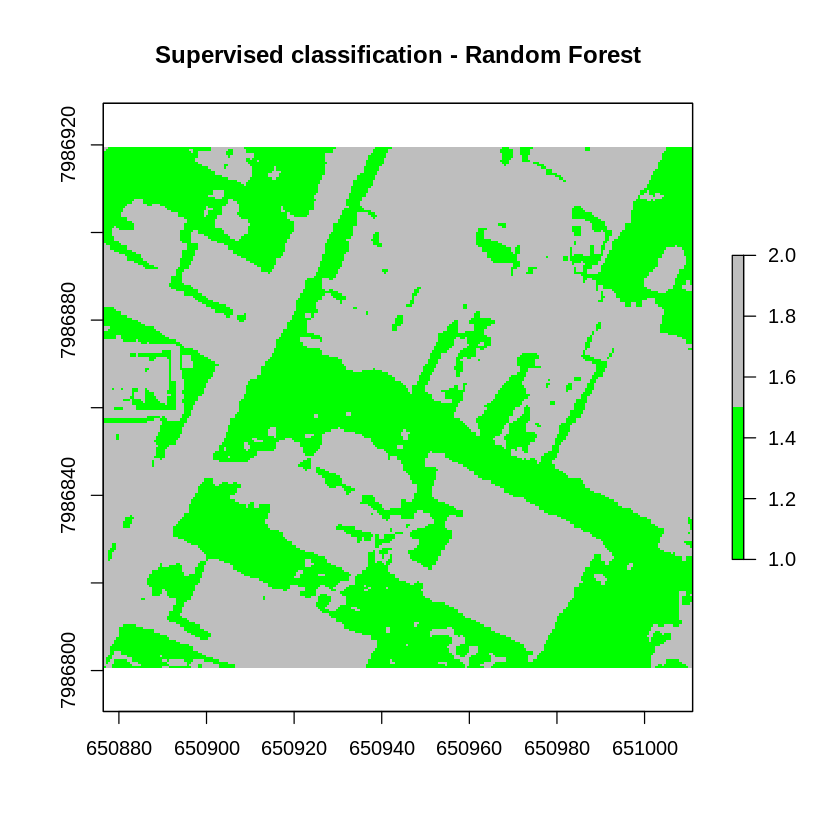

In [12]:
mycolor <- c("green", "gray")

plot(imaClass, main = 'Supervised classification - Random Forest', col=mycolor)